You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
trends = pd.read_csv('ai_tools_comparison.csv')
trends['week'] = pd.to_datetime(trends['week'])
trends.set_index('week', inplace=True)


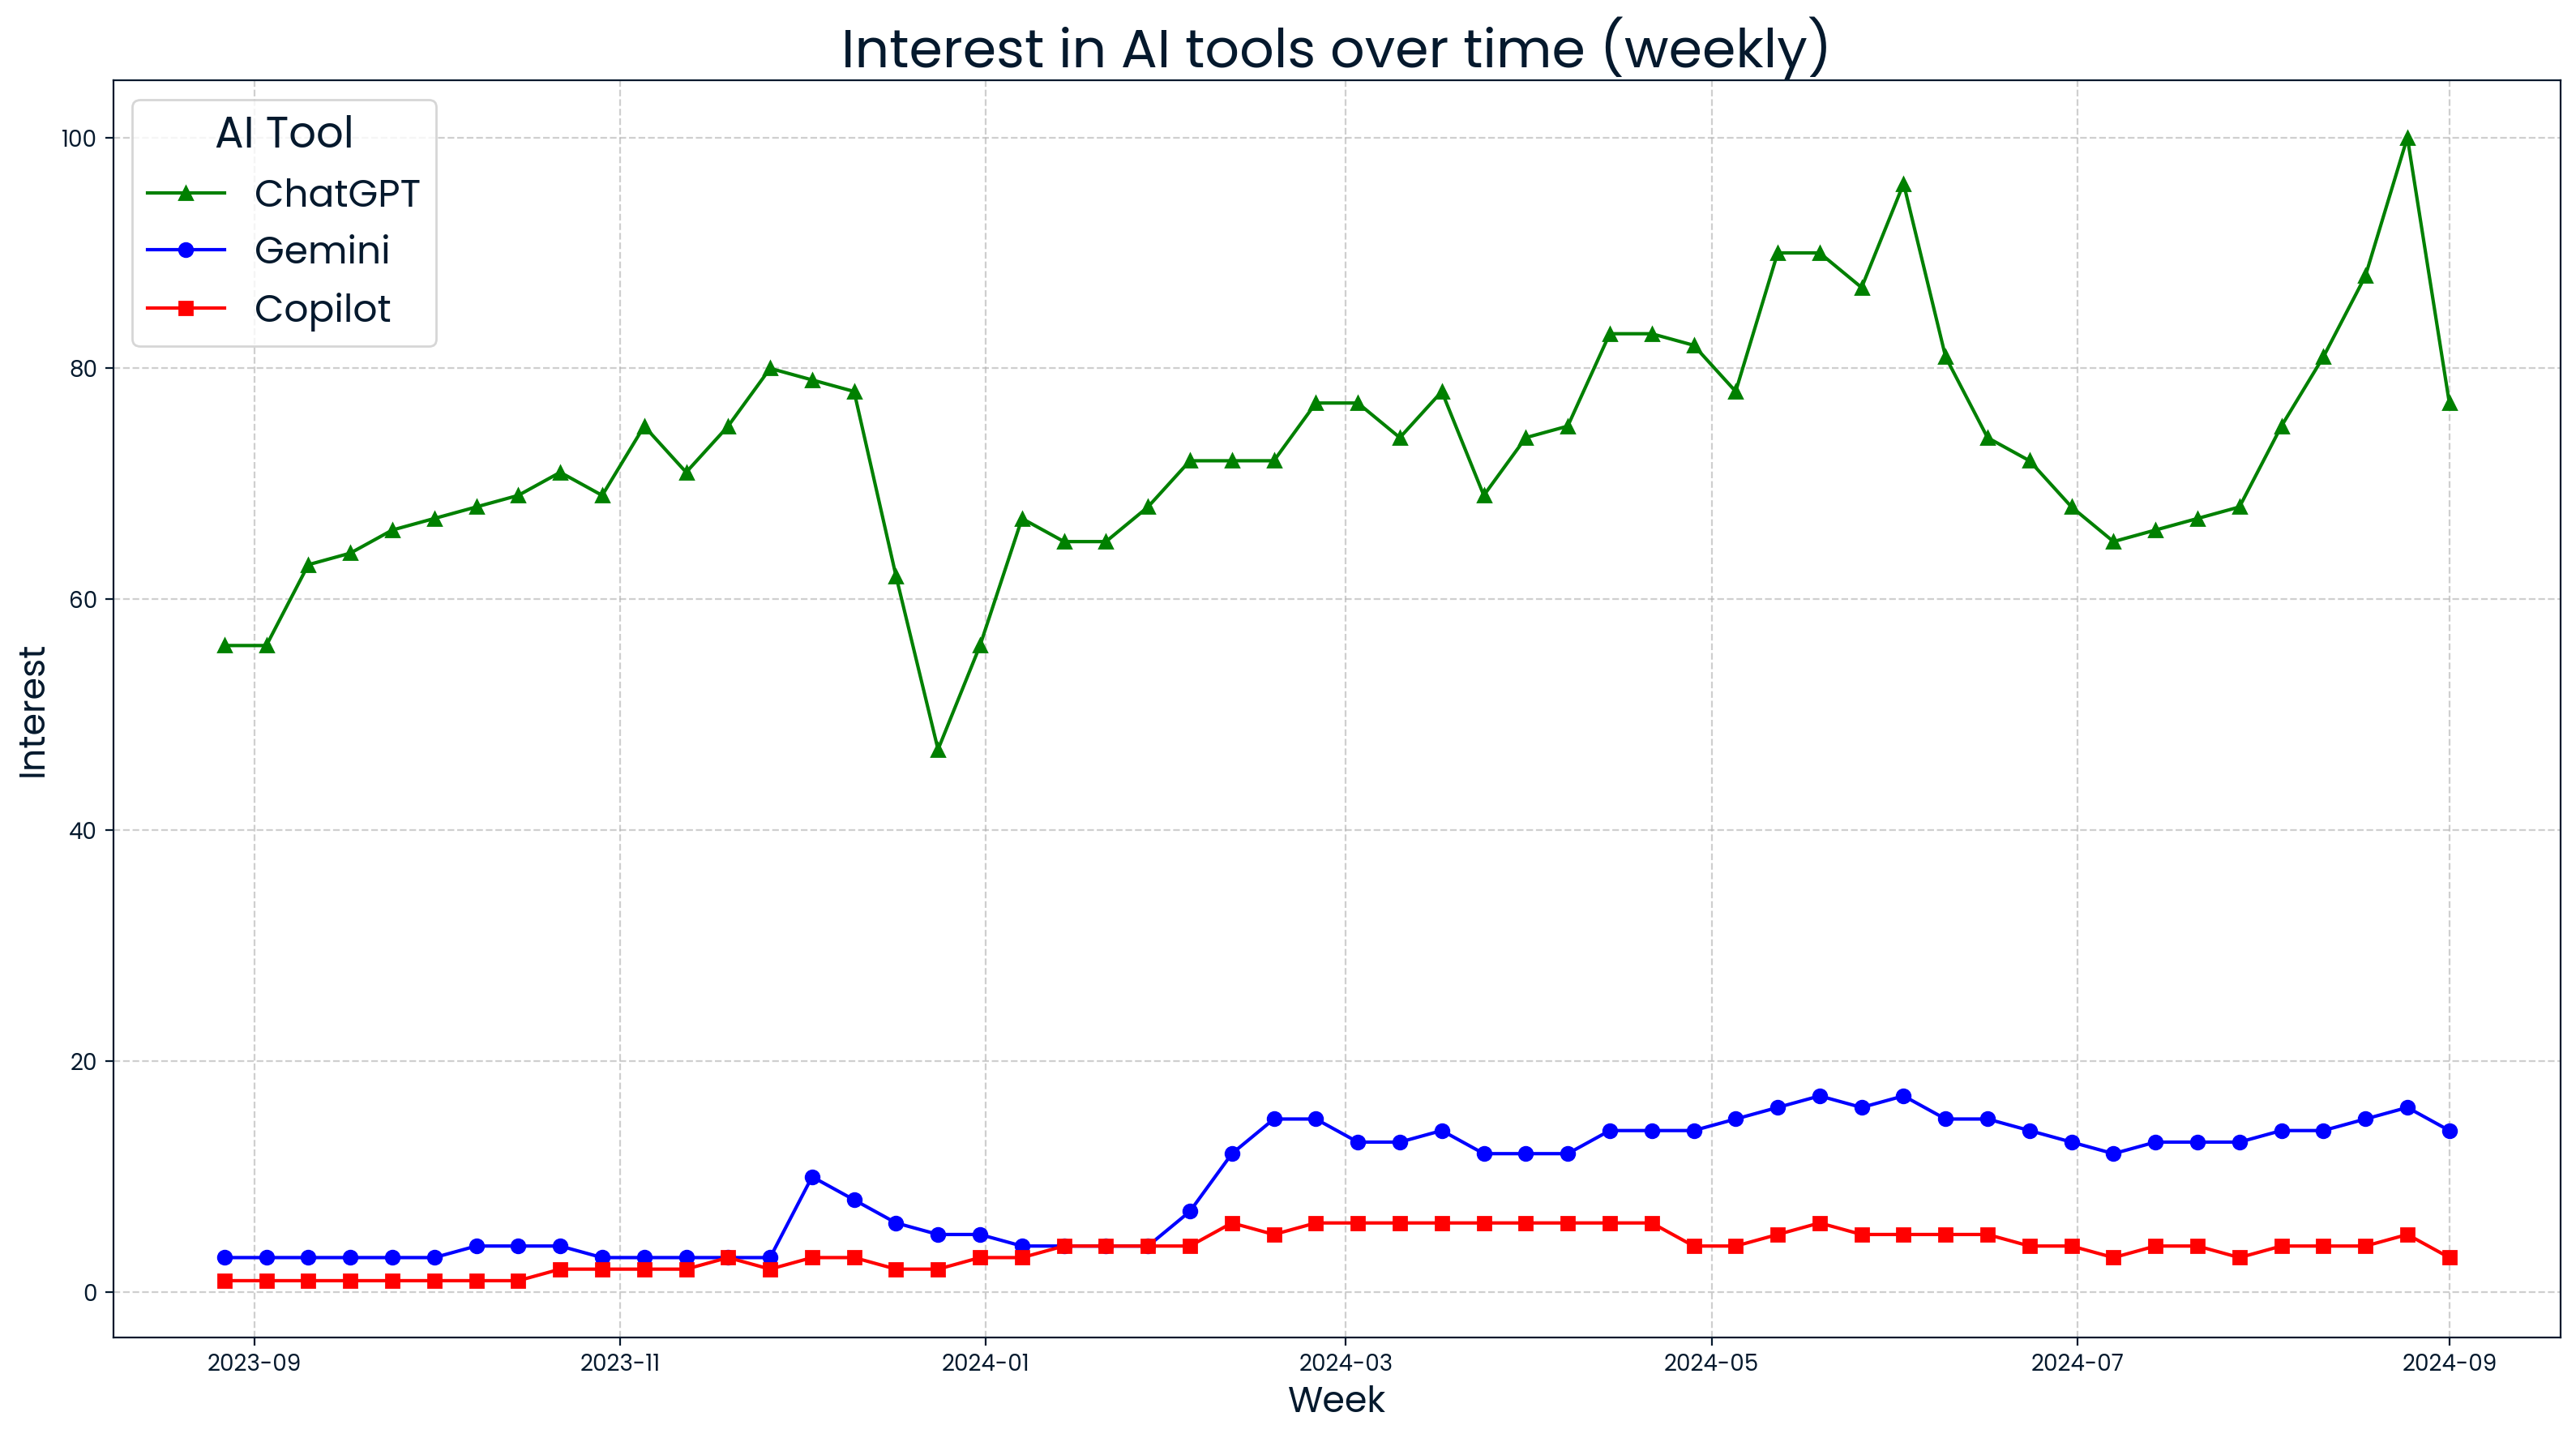

Most consistent tool is: chatgpt
The largest dip in ChatGPT interest was during December 2023
Best month is: May


In [85]:
# Plotting csv file here.
plt.figure(figsize=(16,9))

plt.plot(trends.index, trends['chatgpt'], label="ChatGPT", marker='^', color='green')
plt.plot(trends.index, trends['gemini'], label="Gemini", marker='o', color='blue')
plt.plot(trends.index, trends['microsoft_copilot'], label="Copilot", marker='s', color='red')

plt.title('Interest in AI tools over time (weekly)', fontsize=24)
plt.xlabel('Week', fontsize=16)
plt.ylabel('Interest', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='AI Tool', fontsize=17, title_fontsize=19)
plt.tight_layout()
plt.show()

# Calculate week-over-week percentage change and consistency
growth_rates = trends.pct_change().fillna(0).mul(100)
std_dev = growth_rates.std()
most_consistent_tool = std_dev.idxmin()
print(f"Most consistent tool is: {most_consistent_tool}")

# Identify the largest dip in ChatGPT interest
gpt_dip = "December 2023"  # visually identified as lowest period
print(f"The largest dip in ChatGPT interest was during {gpt_dip}")

# Resample to monthly averages and find the month with the highest overall average
monthly_data = trends.resample('M').mean()
best_month = monthly_data.mean(axis=1).idxmax().strftime('%B')
print(f"Best month is: {best_month}")
